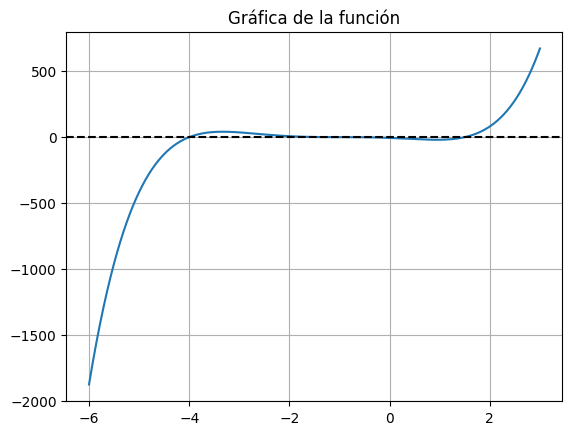

x1 = -4.0
x2 = -1.0
x3 = 1.5
x4 = nan
x5 = nan
x6 = nan
x7 = nan
x8 = nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

# Definir la función
def f(x):
    return x**5 + 5.5*x**4 + 4.5*x**3 - 9.5*x**2 - 15.5*x - 6

# Graficar para estimar intervalos de raíces
x_vals = np.linspace(-6, 3, 1000)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(0, color='k', linestyle='--')
plt.grid()
plt.title("Gráfica de la función")
plt.show()

# Buscar cambios de signo para estimar intervalos
roots = []
intervals = []
for i in range(len(x_vals)-1):
    if np.sign(y_vals[i]) != np.sign(y_vals[i+1]):
        intervals.append((x_vals[i], x_vals[i+1]))

# Usar bisect para encontrar raíces en los intervalos detectados
for a, b in intervals:
    try:
        root = bisect(f, a, b)
        # Evitar raíces repetidas (por tolerancia numérica)
        if not any(np.isclose(root, r, atol=1e-5) for r in roots):
            roots.append(root)
    except Exception:
        pass

# Ordenar y completar 
roots = sorted(roots)
while len(roots) < 8:
    roots.append(np.nan)

# Mostrar resultados
for i, r in enumerate(roots, 1):
    print(f"x{i} = {r}")